In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.io as pio
import plotly.express as px
import statsmodels.api as sm

pio.renderers.default = "vscode"
plt.rcParams["figure.figsize"] = (6,4)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Reading Data and Descriping it

In [2]:
df = pd.read_csv(r'E:\New folder\Online-Retail-Data-Analysis\online_retail_dataset.csv')
df.head(10)

InvoiceNo StockCode     Description  Quantity    InvoiceDate  UnitPrice  \
0     221958  SKU_1964       White Mug        38  1/1/2020 0:00       1.71   
1     771155  SKU_1241       White Mug        18  1/1/2020 1:00      41.25   
2     231932  SKU_1501      Headphones        49  1/1/2020 2:00      29.11   
3     465838  SKU_1760       Desk Lamp        14  1/1/2020 3:00      76.68   
4     359178  SKU_1386       USB Cable       -30  1/1/2020 4:00     -68.11   
5     744167  SKU_1006    Office Chair        47  1/1/2020 5:00      70.16   
6     210268  SKU_1087       USB Cable        25  1/1/2020 6:00      85.74   
7     832180  SKU_1597        Notebook         8  1/1/2020 7:00      95.65   
8     154886  SKU_1907  Wireless Mouse        19  1/1/2020 8:00      98.19   
9     237337  SKU_1866      Headphones        40  1/1/2020 9:00      98.17   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   
5     53887.0          Sweden  0.480000    Credit Card         13.98   
6     46567.0         Belgium  0.150000  Bank Transfer         12.92   
7     75098.0          Norway  0.040000  Bank Transfer          6.48   
8     87950.0         Belgium  0.050000        paypall         12.56   
9     39718.0           Italy  0.160000  Bank Transfer          7.71   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel     In-store  Not Returned              UPS            London   
1  Electronics       Online  Not Returned              UPS              Rome   
2  Electronics       Online      Returned              UPS            Berlin   
3  Accessories       Online  Not Returned       Royal Mail              Rome   
4  Electronics     In-store  Not Returned            FedEx               NaN   
5  Electronics       Online  Not Returned              DHL            London   
6   Stationery       Online  Not Returned            FedEx         Amsterdam   
7  Electronics     In-store  Not Returned       Royal Mail         Amsterdam   
8      Apparel       Online  Not Returned              UPS            Berlin   
9      Apparel       Online  Not Returned       Royal Mail            London   

  OrderPriority  
0        Medium  
1        Medium  
2          High  
3           Low  
4        Medium  
5        Medium  
6          High  
7           Low  
8          High  
9           Low

In [3]:
df.shape

(49782, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [5]:
df.describe().T

count           mean            std        min          25%  \
InvoiceNo     49782.0  550681.239946  260703.009944  100005.00  324543.0000   
Quantity      49782.0      22.372343      17.917774     -50.00      11.0000   
UnitPrice     49782.0      47.537862      33.479510     -99.98      23.5925   
CustomerID    44804.0   55032.871775   25913.660157   10001.00   32750.7500   
Discount      49782.0       0.275748       0.230077       0.00       0.1300   
ShippingCost  47293.0      17.494529       7.220557       5.00      11.2200   

                    50%        75%            max  
InvoiceNo     552244.00  776364.00  999997.000000  
Quantity          23.00      37.00      49.000000  
UnitPrice         48.92      74.61     100.000000  
CustomerID     55165.00   77306.25   99998.000000  
Discount           0.26       0.38       1.999764  
ShippingCost      17.50      23.72      30.000000

Data Cleaning

In [6]:
df = df[(df['Quantity'] >0) & (df['UnitPrice'] >0)]

In [7]:
df.describe().T

count           mean            std       min        25%  \
InvoiceNo     47293.0  549876.780729  260604.327158  100005.0  323764.00   
Quantity      47293.0      24.893578      14.140763       1.0      13.00   
UnitPrice     47293.0      50.585460      28.600790       1.0      25.82   
CustomerID    44804.0   55032.871775   25913.660157   10001.0   32750.75   
Discount      47293.0       0.250463       0.144324       0.0       0.13   
ShippingCost  47293.0      17.494529       7.220557       5.0      11.22   

                    50%        75%       max  
InvoiceNo     551127.00  775235.00  999997.0  
Quantity          25.00      37.00      49.0  
UnitPrice         50.40      75.37     100.0  
CustomerID     55165.00   77306.25   99998.0  
Discount           0.25       0.38       0.5  
ShippingCost      17.50      23.72      30.0

In [8]:
df.replace(['N/A', 'Unknown', 'unknown', '', '-', '_'], np.nan, inplace=True)

In [9]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           2489
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation     996
OrderPriority           0
dtype: int64

In [10]:
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [11]:
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description            0
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID             0
Country                0
Discount               0
PaymentMethod          0
ShippingCost           0
Category               0
SalesChannel           0
ReturnStatus           0
ShipmentProvider       0
WarehouseLocation    996
OrderPriority          0
dtype: int64

In [12]:
df['WarehouseLocation'] = df['WarehouseLocation'].fillna('Unknown')

In [13]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47293 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          47293 non-null  int64  
 1   StockCode          47293 non-null  object 
 2   Description        47293 non-null  object 
 3   Quantity           47293 non-null  int64  
 4   InvoiceDate        47293 non-null  object 
 5   UnitPrice          47293 non-null  float64
 6   CustomerID         47293 non-null  object 
 7   Country            47293 non-null  object 
 8   Discount           47293 non-null  float64
 9   PaymentMethod      47293 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           47293 non-null  object 
 12  SalesChannel       47293 non-null  object 
 13  ReturnStatus       47293 non-null  object 
 14  ShipmentProvider   47293 non-null  object 
 15  WarehouseLocation  47293 non-null  object 
 16  OrderPriority      47293 no

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
categorical_col = df.select_dtypes(include= ['object']).columns.tolist()
categorical_col

['StockCode',
 'Description',
 'CustomerID',
 'Country',
 'PaymentMethod',
 'Category',
 'SalesChannel',
 'ReturnStatus',
 'ShipmentProvider',
 'WarehouseLocation',
 'OrderPriority']

In [17]:
numeric_col = df.select_dtypes(include= ['float64','int64']).columns.to_list()
numeric_col

['InvoiceNo', 'Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

In [18]:
cardinal_col=[]

In [19]:
categorical_col.remove('StockCode')
categorical_col.remove('CustomerID')
numeric_col.remove('InvoiceNo')

cardinal_col.append('StockCode')
cardinal_col.append('CustomerID')
cardinal_col.append('InvoiceNo')

In [20]:
cardinal_col

['StockCode', 'CustomerID', 'InvoiceNo']

In [21]:
categorical_col

['Description',
 'Country',
 'PaymentMethod',
 'Category',
 'SalesChannel',
 'ReturnStatus',
 'ShipmentProvider',
 'WarehouseLocation',
 'OrderPriority']

In [22]:
numeric_col

['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

Exploring Distribution of Data

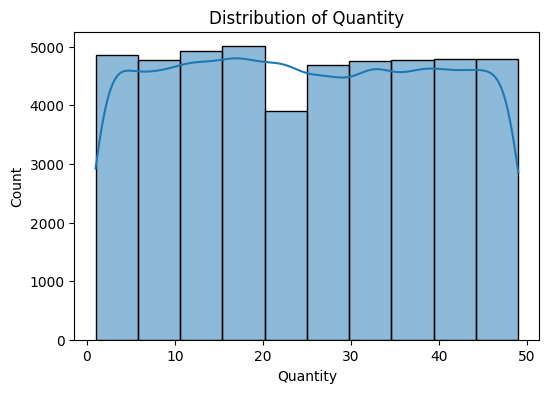

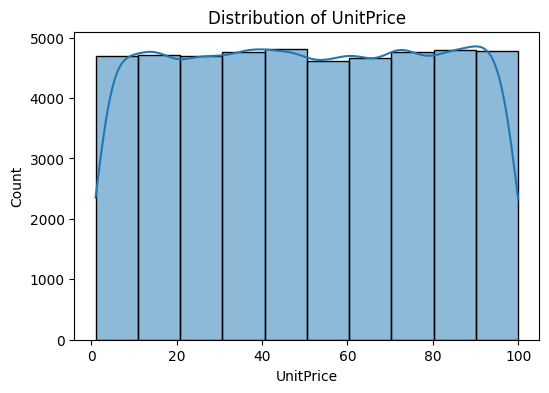

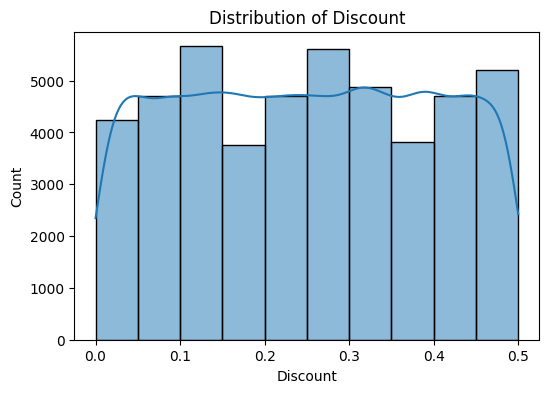

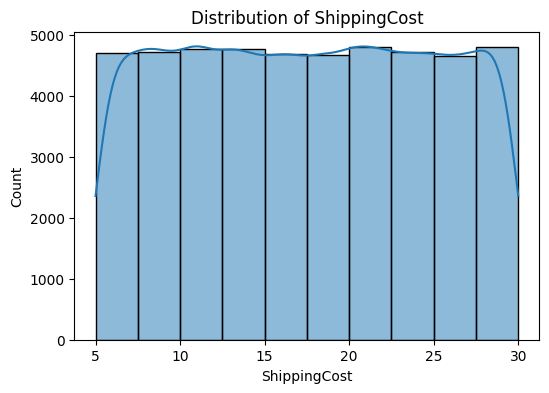

In [23]:
for col in numeric_col:
    plt.Figure()
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.show()


Analysis Of Columns: Description
Unique Values Counts: 11
Unique Values: ['White Mug' 'Headphones' 'Desk Lamp' 'Office Chair' 'USB Cable'
 'Notebook' 'Wireless Mouse' 'Blue Pen' 'Wall Clock' 'T-shirt' 'Backpack']
Value Counts: Description
Wall Clock        4362
USB Cable         4359
Backpack          4355
Desk Lamp         4338
White Mug         4318
Office Chair      4301
Headphones        4282
T-shirt           4268
Blue Pen          4264
Notebook          4230
Wireless Mouse    4216
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




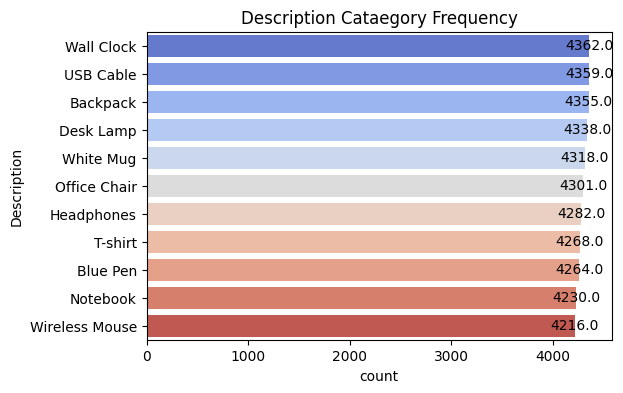


Analysis Of Columns: Country
Unique Values Counts: 12
Unique Values: ['Australia' 'Spain' 'Germany' 'Netherlands' 'Sweden' 'Belgium' 'Norway'
 'Italy' 'United Kingdom' 'Portugal' 'France' 'United States']
Value Counts: Country
France            4021
Sweden            3994
United Kingdom    3973
Germany           3972
Belgium           3963
Portugal          3959
Netherlands       3957
Norway            3938
Spain             3897
Australia         3894
United States     3880
Italy             3845
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




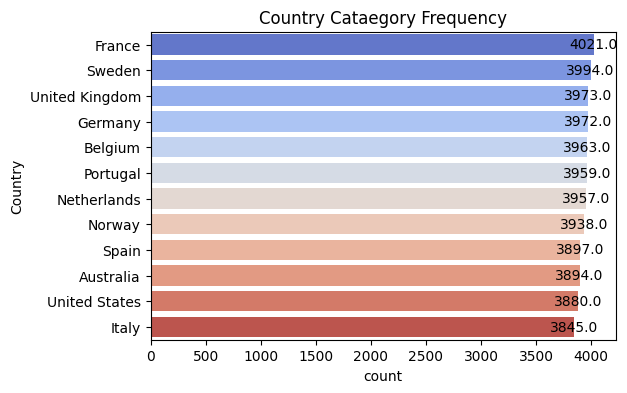


Analysis Of Columns: PaymentMethod
Unique Values Counts: 3
Unique Values: ['Bank Transfer' 'paypall' 'Credit Card']
Value Counts: PaymentMethod
Bank Transfer    15933
Credit Card      15721
paypall          15639
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




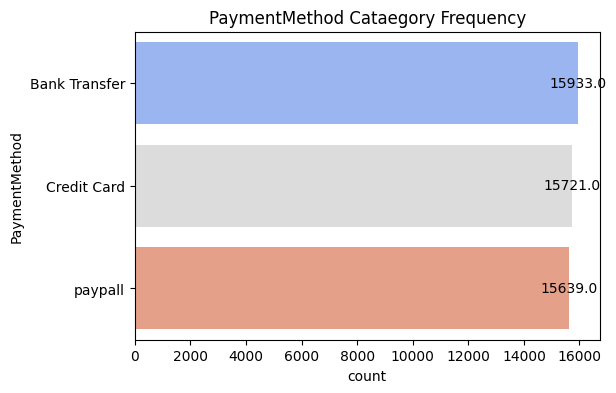


Analysis Of Columns: Category
Unique Values Counts: 5
Unique Values: ['Apparel' 'Electronics' 'Accessories' 'Stationery' 'Furniture']
Value Counts: Category
Furniture      9577
Accessories    9454
Stationery     9446
Electronics    9433
Apparel        9383
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




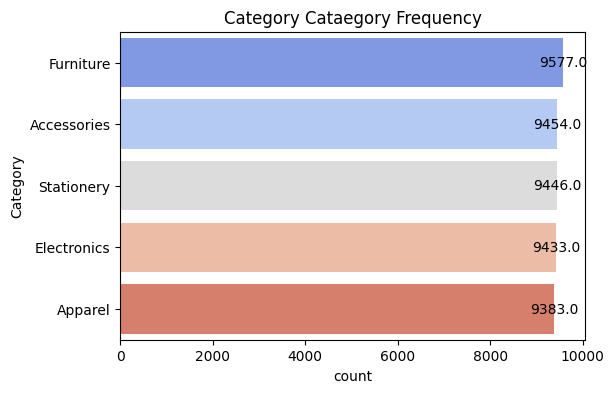


Analysis Of Columns: SalesChannel
Unique Values Counts: 2
Unique Values: ['In-store' 'Online']
Value Counts: SalesChannel
Online      23762
In-store    23531
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




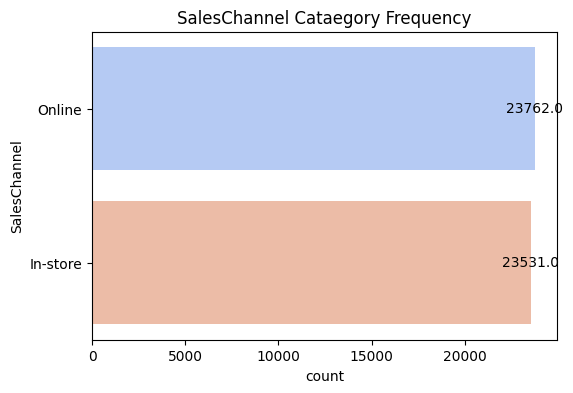


Analysis Of Columns: ReturnStatus
Unique Values Counts: 2
Unique Values: ['Not Returned' 'Returned']
Value Counts: ReturnStatus
Not Returned    42647
Returned         4646
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




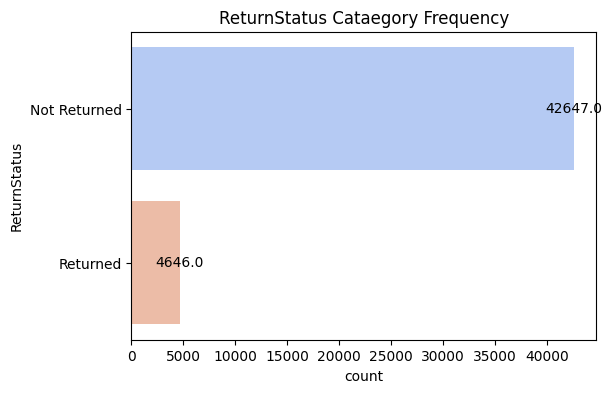


Analysis Of Columns: ShipmentProvider
Unique Values Counts: 4
Unique Values: ['UPS' 'Royal Mail' 'DHL' 'FedEx']
Value Counts: ShipmentProvider
FedEx         11902
Royal Mail    11816
DHL           11796
UPS           11779
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




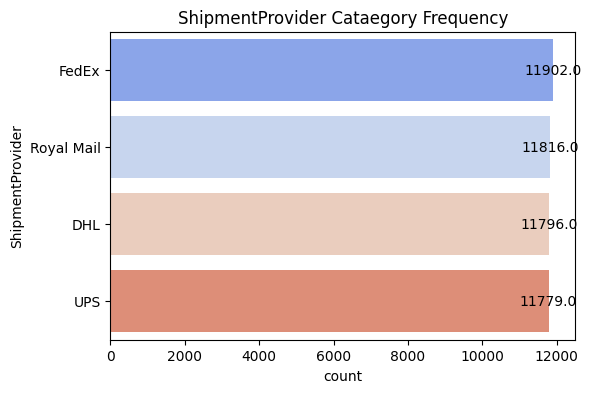


Analysis Of Columns: WarehouseLocation
Unique Values Counts: 6
Unique Values: ['London' 'Rome' 'Berlin' 'Amsterdam' 'Paris' 'Unknown']
Value Counts: WarehouseLocation
Amsterdam    9458
London       9230
Rome         9226
Berlin       9210
Paris        9173
Unknown       996
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




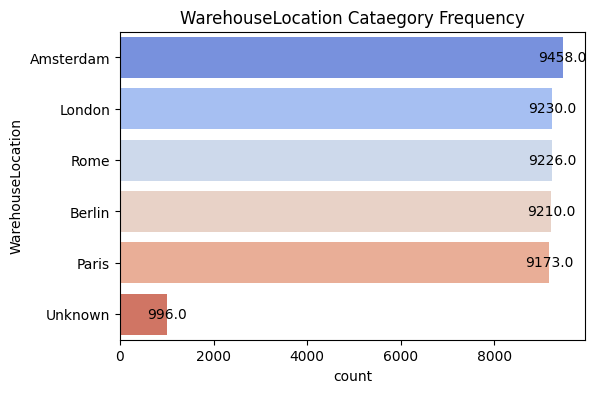


Analysis Of Columns: OrderPriority
Unique Values Counts: 3
Unique Values: ['Medium' 'High' 'Low']
Value Counts: OrderPriority
Medium    15822
High      15763
Low       15708
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7512\3366582573.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




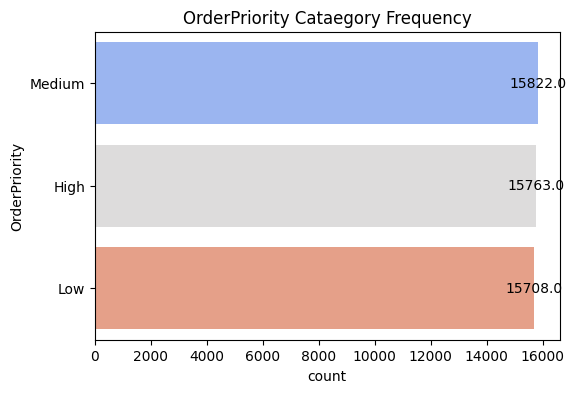

In [24]:
for col in categorical_col:
    print(f'\nAnalysis Of Columns: {col}')
    print(f'Unique Values Counts: {df[col].nunique()}')
    print(f'Unique Values: {df[col].unique()}')
    print(f'Value Counts: {df[col].value_counts()}')

    plt.Figure()
    ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')
    plt.title(f'{col} Cataegory Frequency')
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center')
    plt.show()

Outlier Detection

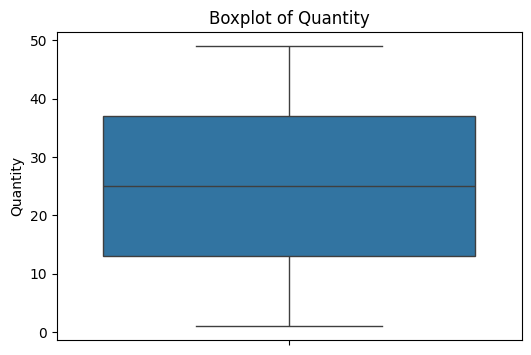

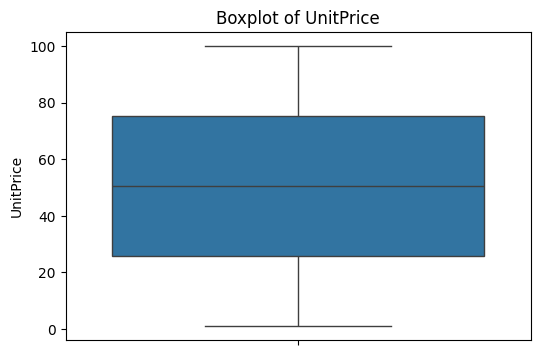

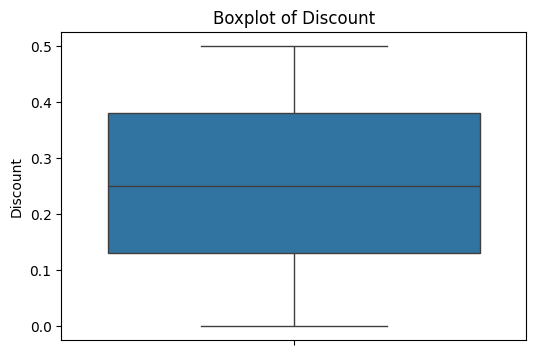

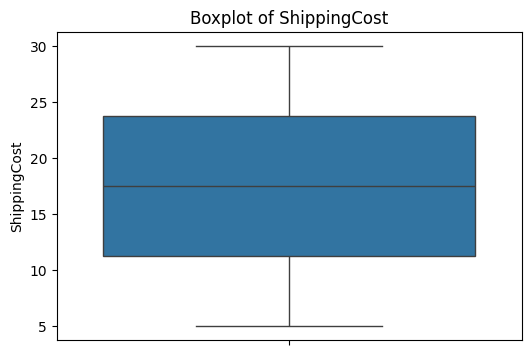

In [25]:
for col in numeric_col:
    plt.Figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
def plot_all_boxplots(df, num_col):
    # Create subplots: 1 row and as many columns as there are numeric columns
    fig = sp.make_subplots(rows=1, cols=len(num_col), subplot_titles=num_col, horizontal_spacing=0.1)  # Adjust spacing between subplots

    # Loop over the numeric columns and create a box plot for each
    for i, col in enumerate(num_col):
        fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

    fig.update_layout(height=500, width=300 * len(num_col), title_text="Box Plots of Numeric Columns")
    fig.show()

plot_all_boxplots(df, numeric_col)

Feature Engineering

In [27]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice'] 
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()

In [28]:
numeric_col.append('TotalSales')
numeric_col.append('Revenue')
numeric_col

['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalSales', 'Revenue']

In [29]:
def plot_all_boxplots(df, num_col):
    # Create subplots: 1 row and as many columns as there are numeric columns
    fig = sp.make_subplots(rows=1, cols=len(num_col), subplot_titles=num_col, horizontal_spacing=0.1)  # Adjust spacing between subplots

    # Loop over the numeric columns and create a box plot for each
    for i, col in enumerate(num_col):
        fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

    fig.update_layout(height=500, width=300 * len(num_col), title_text="Box Plots of Numeric Columns")
    fig.show()

plot_all_boxplots(df, numeric_col)

In [30]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_ratio = 100 * len(outliers) / len(df)

    print(f'{col}: {outliers_ratio:.2f}% outliers')

Quantity: 0.00% outliers
UnitPrice: 0.00% outliers
Discount: 0.00% outliers
ShippingCost: 0.00% outliers
TotalSales: 1.18% outliers
Revenue: 2.50% outliers


In [31]:
df = df[(df[col] >= lower) & (df[col] <= upper)]

In [32]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_ratio = 100 * len(outliers) / len(df)

    print(f'{col}: {outliers_ratio:.2f}% outliers')

Quantity: 0.00% outliers
UnitPrice: 0.00% outliers
Discount: 0.00% outliers
ShippingCost: 0.00% outliers
TotalSales: 0.92% outliers
Revenue: 0.85% outliers


In [33]:
df.head()

InvoiceNo StockCode   Description  Quantity         InvoiceDate  UnitPrice  \
0     221958  SKU_1964     White Mug        38 2020-01-01 00:00:00       1.71   
1     771155  SKU_1241     White Mug        18 2020-01-01 01:00:00      41.25   
2     231932  SKU_1501    Headphones        49 2020-01-01 02:00:00      29.11   
3     465838  SKU_1760     Desk Lamp        14 2020-01-01 03:00:00      76.68   
5     744167  SKU_1006  Office Chair        47 2020-01-01 05:00:00      70.16   

  CustomerID      Country  Discount  PaymentMethod  ShippingCost     Category  \
0    37039.0    Australia      0.47  Bank Transfer         10.79      Apparel   
1    19144.0        Spain      0.19        paypall          9.51  Electronics   
2    50472.0      Germany      0.35  Bank Transfer         23.03  Electronics   
3    96586.0  Netherlands      0.14        paypall         11.08  Accessories   
5    53887.0       Sweden      0.48    Credit Card         13.98  Electronics   

  SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  \
0     In-store  Not Returned              UPS            London        Medium   
1       Online  Not Returned              UPS              Rome        Medium   
2       Online      Returned              UPS            Berlin          High   
3       Online  Not Returned       Royal Mail              Rome           Low   
5       Online  Not Returned              DHL            London        Medium   

   TotalSales    Revenue        Day    Month  
0       64.98    34.4394  Wednesday  January  
1      742.50   601.4250  Wednesday  January  
2     1426.39   927.1535  Wednesday  January  
3     1073.52   923.2272  Wednesday  January  
5     3297.52  1714.7104  Wednesday  January

Save Cleaned Data

In [34]:
df.to_csv("cleaned_data.csv", index=False) 

Data Visualization

In [35]:
#Total Sales By Country

sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(sales_by_country,
             x='Country',
             y='TotalSales',
             title='Total Sales By Country',
             labels={'TotalSales' : 'Sales' , 'Country' : 'Countries'},
             color = 'Country'
            )
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [36]:
#Payement Methods Usage

payement_method_counts = df['PaymentMethod'].value_counts().reset_index()
payement_method_counts.columns = ['PayementMethod' , 'Count']

fig = px.pie(payement_method_counts,
             names= 'PayementMethod',
             values= 'Count',
             title= 'Payement Methods Usage'   
            )
fig.show()

In [37]:
#Top 10 Performing Products By Revenue

top10 = df.groupby('Description')['Revenue'].sum().nlargest(10).reset_index()

fig = px.bar(
            top10,
            x= 'Description',
            y= 'Revenue',
            title = 'Top 10 Products by Revenue',
            labels = {'Revenue':'Product Income' , 'Description' : 'Product Name'},
            color = 'Revenue',
            color_continuous_scale = 'tempo'
            )
fig.show()

In [38]:
#Customer Average Spending By Country

avg_spend = df.groupby('Country')['Revenue'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(avg_spend,
             x = 'Country',
             y = 'Revenue',
             title = 'Average Spending Per Customer By Country',
             labels = {'Revenue' : 'Average Spending' , 'Country' : 'Countries'},
             color = 'Country'
            )
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [39]:
#Correlation Matrix For Numeric Features

correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                color_continuous_scale='Blues', 
                title="Correlation Matrix of Numeric Columns",
                width=600,  
                height=600)

fig.show()

In [40]:
df.head(1)

InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01       1.71   

  CustomerID    Country  Discount  PaymentMethod  ShippingCost Category  \
0    37039.0  Australia      0.47  Bank Transfer         10.79  Apparel   

  SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  \
0     In-store  Not Returned              UPS            London        Medium   

   TotalSales  Revenue        Day    Month  
0       64.98  34.4394  Wednesday  January

In [41]:
#Total Sales By Sales Channel

sales_channels = df.groupby('SalesChannel')['TotalSales'].sum().reset_index()
fig = px.bar(sales_channels,
             x = 'SalesChannel',
             y = 'TotalSales',
             title = 'Total Sales By Sales Channel',
             labels = {'TotalSales' : 'TotalSales'},
             color = 'SalesChannel'         
            )
fig.update_layout(width=500 , height=500)
fig.show()

In [42]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()
fig = px.line(daily_sales,
              x = 'InvoiceDate',
              y = 'TotalSales',
              title = 'Daily Sales trend',
              labels={'InvoiceDate' : 'Date' , 'TotalSales' : 'Sales'}      
             )

fig.show()

In [43]:
Monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum().reset_index()
Monthly_sales['InvoiceDate'] = Monthly_sales['InvoiceDate'].astype(str)
fig = px.line(Monthly_sales,
              x = 'InvoiceDate',
              y = 'TotalSales',
              title = 'Monthly Sales trend',
              labels={'InvoiceDate' : 'Month' , 'TotalSales' : 'Sales'}      
             )

fig.show()

In [44]:
Quartrly_sales = df.groupby(df['InvoiceDate'].dt.to_period('Q'))['TotalSales'].sum().reset_index()
Quartrly_sales['InvoiceDate'] = Quartrly_sales['InvoiceDate'].astype(str)
fig = px.line(Quartrly_sales,
              x = 'InvoiceDate',
              y = 'TotalSales',
              title = 'Quartrly Sales trend',
              labels={'InvoiceDate' : 'Quarter' , 'TotalSales' : 'Sales'}      
             )

fig.show()

In [45]:
Yearly_sales = df.groupby(df['InvoiceDate'].dt.year)['TotalSales'].sum().reset_index()
Yearly_sales['InvoiceDate'] = Yearly_sales['InvoiceDate'].astype(str)
fig = px.line(Yearly_sales,
              x = 'InvoiceDate',
              y = 'TotalSales',
              title = 'Yearly Sales trend',
              labels={'InvoiceDate' : 'Year' , 'TotalSales' : 'Sales'}      
             )

fig.show()

Statistical Analysis

In [ ]:
#Normality Test by Shapiro

from scipy.stats import shapiro
for col in numeric_col:
    stat , p = shapiro(df[col])
    print(f"{col}: p-value = {p}")


Quantity: p-value = ShapiroResult(statistic=np.float64(0.9566088067069191), pvalue=np.float64(1.6636429211726367e-75))
UnitPrice: p-value = ShapiroResult(statistic=np.float64(0.9571447372038031), pvalue=np.float64(3.132659872052483e-75))
Discount: p-value = ShapiroResult(statistic=np.float64(0.9560136430986027), pvalue=np.float64(8.302142136379784e-76))
ShippingCost: p-value = ShapiroResult(statistic=np.float64(0.9545412138131882), pvalue=np.float64(1.5382605710624515e-76))
TotalSales: p-value = ShapiroResult(statistic=np.float64(0.9045691998256646), pvalue=np.float64(5.529525038847848e-94))
Revenue: p-value = ShapiroResult(statistic=np.float64(0.8998309188915687), pvalue=np.float64(3.461068261501543e-95))


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46109.



In [47]:
#Kruskal

from scipy.stats import kruskal

def kruskal_wallis(df, dep, indep):
    groups = df[indep].unique()
    data_by_group = [df[df[indep] == group][dep] for group in groups]

    stat , p_value = kruskal(*data_by_group)

    print(f'Kruskal-Wallis Test between {dep} vs {indep}')
    print(f'P-Value = {p_value}')

    if p_value < 0.05:
        print('There is significant difference between groups at 95% confidence.')
    else:
        print('There is no significant difference between groups at 95% confidence.')


In [48]:
kruskal_wallis(df , 'TotalSales' , 'Country')
kruskal_wallis(df , 'Revenue' , 'Country')
kruskal_wallis(df , 'Quantity' , 'Country')

Kruskal-Wallis Test between TotalSales vs Country
P-Value = 0.20771803721692106
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Revenue vs Country
P-Value = 0.10387948254373144
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Quantity vs Country
P-Value = 0.9244097151795183
There is no significant difference between groups at 95% confidence.


In [49]:
kruskal_wallis(df , 'TotalSales' , 'SalesChannel')
kruskal_wallis(df , 'Revenue' , 'SalesChannel')
kruskal_wallis(df , 'Quantity' , 'SalesChannel')

Kruskal-Wallis Test between TotalSales vs SalesChannel
P-Value = 0.15969730233656879
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Revenue vs SalesChannel
P-Value = 0.1276686528343561
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Quantity vs SalesChannel
P-Value = 0.6302716750019615
There is no significant difference between groups at 95% confidence.


In [50]:
kruskal_wallis(df , 'TotalSales' , 'PaymentMethod')
kruskal_wallis(df , 'Revenue' , 'PaymentMethod')

Kruskal-Wallis Test between TotalSales vs PaymentMethod
P-Value = 0.43840286391790195
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Revenue vs PaymentMethod
P-Value = 0.4267679454884199
There is no significant difference between groups at 95% confidence.


In [51]:
kruskal_wallis(df , 'TotalSales' , 'Category')
kruskal_wallis(df , 'Revenue' , 'Category')
kruskal_wallis(df , 'Quantity' , 'Category')
kruskal_wallis(df , 'UnitPrice' , 'Category')
kruskal_wallis(df , 'Discount' , 'Category')
kruskal_wallis(df , 'ShippingCost' , 'Category')

Kruskal-Wallis Test between TotalSales vs Category
P-Value = 0.5363775109576093
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Revenue vs Category
P-Value = 0.40255674111545325
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Quantity vs Category
P-Value = 0.2936565242541695
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between UnitPrice vs Category
P-Value = 0.5099121134825007
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between Discount vs Category
P-Value = 0.347388472881659
There is no significant difference between groups at 95% confidence.
Kruskal-Wallis Test between ShippingCost vs Category
P-Value = 0.9171438133832105
There is no significant difference between groups at 95% confidence.


In [52]:
#ANOVA

from statsmodels.formula.api import ols

def anova_test(df, dep, indep):
    model = ols(f'{dep} ~ C({indep})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f'ANOVA Test between {dep} vs {indep}')
    print(anova_table)

    p_value = anova_table["PR(>F)"][0]

    if p_value < 0.05:
        print('There is significant difference between groups at 95% confidence.')
    else:
        print('There is no significant difference between groups at 95% confidence.')


In [53]:
#T-Test

from scipy.stats import ttest_ind

def t_test(df, dep, indep, group1, group2):
    data1 = df[df[indep] == group1][dep].dropna()
    data2 = df[df[indep] == group2][dep].dropna()

    stat, p_value = ttest_ind(data1, data2, equal_var=False)

    print(f'T-test between {dep} for {group1} vs {group2}')
    print(f'P-Value = {p_value:.4f}')

    if p_value < 0.05:
        print('There is significant difference between the two groups at 95% confidence.')
    else:
        print('There is no significant difference between the two groups at 95% confidence.')


In [ ]:
#Mann-Whitney U

from scipy.stats import mannwhitneyu

def mann_whitney_test(df, dep, indep, group1, group2):
    data1 = df[df[indep] == group1][dep].dropna()
    data2 = df[df[indep] == group2][dep].dropna()

    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

    print(f'Mann-Whitney U Test between {dep} for {group1} vs {group2}')
    print(f'P-Value = {p_value:.4f}')

    if p_value < 0.05:
        print('There is significant difference between the two groups at 95% confidence.')
    else:
        print('There is no significant difference between the two groups at 95% confidence.')


In [54]:
#Chi-Square

from scipy.stats import chi2_contingency

def chi_square_test(df, var1, var2):
    table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = chi2_contingency(table)

    print(f'Chi-Square Test between {var1} and {var2}')
    print(f'P-Value = {p_value:.4f}')

    if p_value < 0.05:
        print('There is a significant association between the two variables at 95% confidence.')
    else:
        print('There is no significant association between the two variables at 95% confidence.')


In [55]:
chi_square_test(df , 'Country' , 'Category')

Chi-Square Test between Country and Category
P-Value = 0.1429
There is no significant association between the two variables at 95% confidence.


In [56]:
chi_square_test(df , 'SalesChannel' , 'PaymentMethod')

Chi-Square Test between SalesChannel and PaymentMethod
P-Value = 0.9844
There is no significant association between the two variables at 95% confidence.
